<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

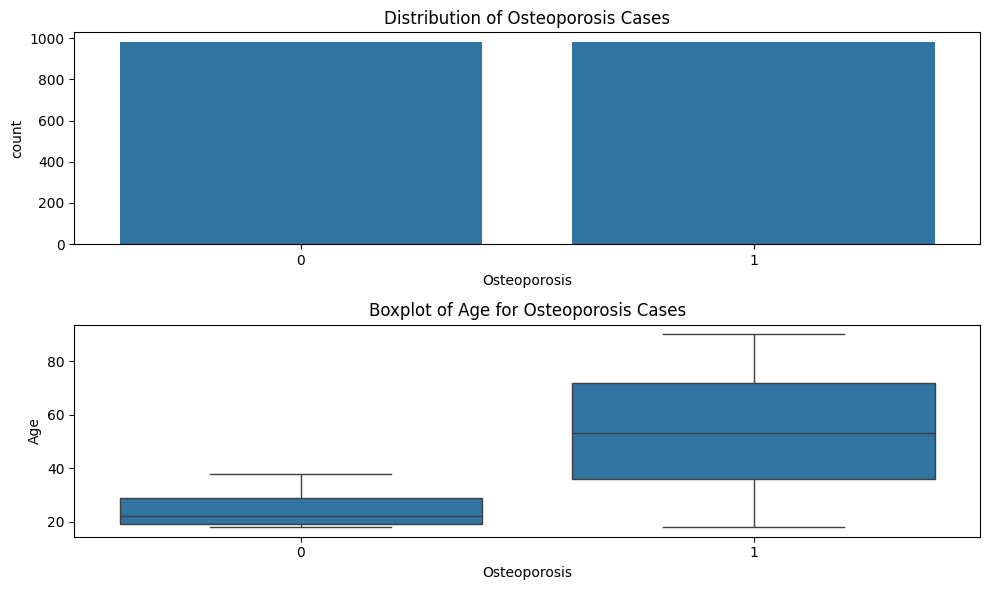

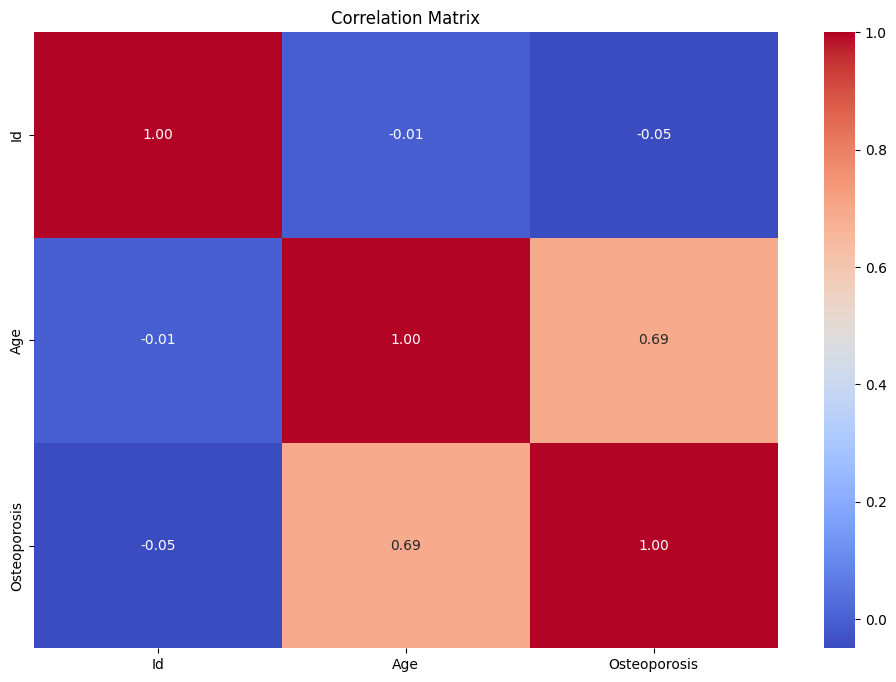

Please enter the following details:
Age: 69
Gender (Male/Female): Female
Hormonal Changes (Yes/No): Normal
Family History (Yes/No): 	Yes
Race/Ethnicity: Asian
Body Weight: Underweight
Calcium Intake: Low
Vitamin D Intake: Sufficient
Physical Activity (Yes/No): Sedentary
Smoking (Yes/No): yes
Alcohol Consumption (Yes/No): Moderate
Medical Conditions (Comma separated): Rheumatoid Arthritis
Medications (Comma separated): None	
Prior Fractures (Yes/No): Yes
The model predicts: High risk of osteoporosis.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load the dataset
data = pd.read_csv('/content/osteoporosis.csv')
# Display basic information
print(data.info())
print(data.describe())


# Visualizations
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.countplot(x='Osteoporosis', data=data)
plt.title('Distribution of Osteoporosis Cases')

# Add a boxplot of a numerical feature to check for outliers (e.g., 'Age')
plt.subplot(2, 1, 2)
sns.boxplot(x='Osteoporosis', y='Age', data=data)
plt.title('Boxplot of Age for Osteoporosis Cases')

# Display both plots
plt.tight_layout()
plt.show()

# Correlation matrix - Select only numeric columns
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)  # Select numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
                    'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
                    'Physical Activity', 'Smoking', 'Alcohol Consumption',
                    'Medical Conditions', 'Medications', 'Prior Fractures']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Prepare data for modeling
X = data.drop(['Id', 'Osteoporosis'], axis=1)  # Drop non-feature columns
y = data['Osteoporosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data reduction (optional)
pca = PCA(n_components=0.95)  # Adjust based on variance explained
X_reduced = pca.fit_transform(X_scaled)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numeric type (int or float) before training and evaluating the model
# This line addresses the error by converting the target variable to a standard numeric type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and preprocessing objects
joblib.dump(model, 'osteoporosis_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(pca, 'pca.pkl')

# Function to predict osteoporosis risk based on user input
def predict_osteoporosis():
    print("Please enter the following details:")

    # Collecting user input
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    hormonal_changes = input("Hormonal Changes (Yes/No): ")
    family_history = input("Family History (Yes/No): ")
    race = input("Race/Ethnicity: ")
    body_weight = input("Body Weight: ")
    calcium_intake = input("Calcium Intake: ")
    vitamin_d_intake = input("Vitamin D Intake: ")
    physical_activity = input("Physical Activity (Yes/No): ")
    smoking = input("Smoking (Yes/No): ")
    alcohol_consumption = input("Alcohol Consumption (Yes/No): ")
    medical_conditions = input("Medical Conditions (Comma separated): ")
    medications = input("Medications (Comma separated): ")
    prior_fractures = input("Prior Fractures (Yes/No): ")

    # Creating a DataFrame for the new input
    # Include 'Id' and 'Osteoporosis' with dummy values
    new_data = pd.DataFrame({
        'Id': [0],  # Dummy value for 'Id'
        'Age': [age],
        'Gender': [gender],
        'Hormonal Changes': [hormonal_changes],
        'Family History': [family_history],
        'Race/Ethnicity': [race],
        'Body Weight': [body_weight],
        'Calcium Intake': [calcium_intake],
        'Vitamin D Intake': [vitamin_d_intake],
        'Physical Activity': [physical_activity],
        'Smoking': [smoking],
        'Alcohol Consumption': [alcohol_consumption],
        'Medical Conditions': [medical_conditions],
        'Medications': [medications],
        'Prior Fractures': [prior_fractures],
        'Osteoporosis': [0]  # Dummy value for 'Osteoporosis'
    })

    # Preprocess the input data
    new_data_imputed = imputer.transform(new_data)
    # Convert back to DataFrame to ensure columns are preserved
    new_data_imputed = pd.DataFrame(new_data_imputed, columns=new_data.columns)
    new_data_encoded = pd.get_dummies(new_data_imputed, columns=categorical_cols, drop_first=True)

    # Align columns to match the training data
    new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

    # ... (rest of your code remains the same) ...
    # Scale and reduce dimensions
    new_data_scaled = scaler.transform(new_data_encoded)
    new_data_reduced = pca.transform(new_data_scaled)

    # Make a prediction
    prediction = model.predict(new_data_reduced)

    if prediction[0] == 1:
        print("The model predicts: High risk of osteoporosis.")
    else:
        print("The model predicts: Low risk of osteoporosis.")

# Call the function
predict_osteoporosis()
